In [11]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

from PIL import Image
import glob
import os
from sklearn.model_selection import train_test_split

print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


In [13]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
    
def load_data(img_path, number_of_data):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path, 7372)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

x_train, x_val, y_train, y_val = train_test_split(x_train_norm, y_train, test_size=0.1, random_state=0)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 223)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화


print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

2467  images to be resized.
2467  images resized.
2504  images to be resized.
2504  images resized.
2401  images to be resized.
2401  images resized.
학습데이터(x_train)의 이미지 개수는 7372 입니다.
x_train shape: (6634, 28, 28, 3)
y_train shape: (6634,)
100  images to be resized.
100  images resized.
73  images to be resized.
73  images resized.
50  images to be resized.
50  images resized.
학습데이터(x_train)의 이미지 개수는 223 입니다.
x_test shape: (223, 28, 28, 3)
y_test shape: (223,)


라벨:  2


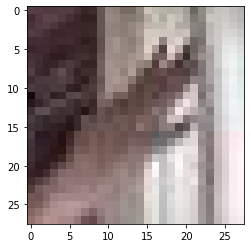

In [14]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [18]:
n_channel_1=120
n_channel_2=400
n_dense=200
n_train_epoch=25
#56프로
# n_channel_1=120
# n_channel_2=400
# n_dense=30
# n_train_epoch=25

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 120)       3360      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 120)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 400)       432400    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 400)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               2000200   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [19]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=n_train_epoch)

Epoch 1/25
208/208 [==============================] - 2s 6ms/step - loss: 0.9626 - accuracy: 0.5125 - val_loss: 0.7040 - val_accuracy: 0.7154
Epoch 2/25
208/208 [==============================] - 1s 5ms/step - loss: 0.4884 - accuracy: 0.7994 - val_loss: 0.3722 - val_accuracy: 0.8523
Epoch 3/25
208/208 [==============================] - 1s 5ms/step - loss: 0.2691 - accuracy: 0.8952 - val_loss: 0.2640 - val_accuracy: 0.9065
Epoch 4/25
208/208 [==============================] - 1s 5ms/step - loss: 0.1711 - accuracy: 0.9341 - val_loss: 0.1994 - val_accuracy: 0.9377
Epoch 5/25
208/208 [==============================] - 1s 5ms/step - loss: 0.1095 - accuracy: 0.9570 - val_loss: 0.1556 - val_accuracy: 0.9499
Epoch 6/25
208/208 [==============================] - 1s 5ms/step - loss: 0.0831 - accuracy: 0.9699 - val_loss: 0.1064 - val_accuracy: 0.9621
Epoch 7/25
208/208 [==============================] - 1s 5ms/step - loss: 0.0624 - accuracy: 0.9765 - val_loss: 0.0752 - val_accuracy: 0.9756
Epoch 

In [20]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

7/7 - 0s - loss: 3.4175 - accuracy: 0.6637
test_loss: 3.4174582958221436
test_accuracy: 0.6636771559715271


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


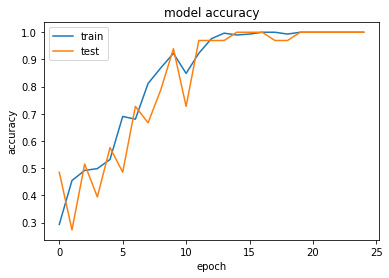

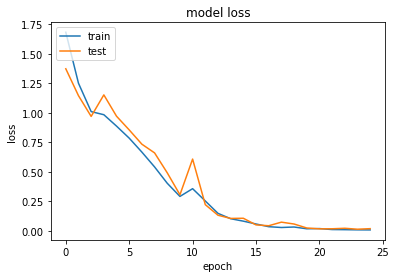

In [151]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()